In [ ]:
## Part A

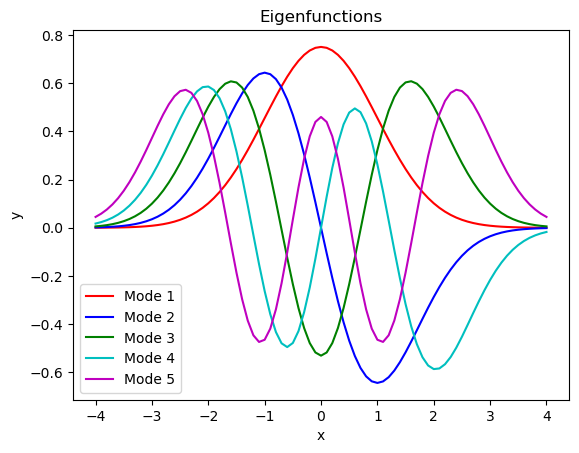

Eigenvalues: [0.9997351033613083, 2.999002601020038, 4.998463047854603, 6.997580946795643, 8.996253813616933]
Eigenfunctions stored in array format.
(81, 5)
[[2.52638135e-04 1.45263285e-03 5.65791031e-03 1.74251499e-02
  4.49739350e-02]
 [3.74361154e-04 2.08091497e-03 7.87411633e-03 2.34945618e-02
  5.85286297e-02]
 [5.49693592e-04 2.96478464e-03 1.08974131e-02 3.14959748e-02
  7.57134026e-02]
 [7.99574272e-04 4.19028063e-03 1.49550169e-02 4.18500927e-02
  9.70305188e-02]
 [1.15147827e-03 5.86546311e-03 2.03156259e-02 5.50071664e-02
  1.22893334e-01]
 [1.64186824e-03 8.12655207e-03 2.72920340e-02 7.14287816e-02
  1.53601132e-01]
 [2.31861693e-03 1.11444525e-02 3.62571791e-02 9.16073677e-02
  1.89281301e-01]
 [3.24129939e-03 1.51206909e-02 4.76086567e-02 1.15976002e-01
  2.29812190e-01]
 [4.48498071e-03 2.02874805e-02 6.17600441e-02 1.44840285e-01
  2.74657962e-01]
 [6.14581779e-03 2.69273203e-02 7.91314283e-02 1.78373615e-01
  3.22846351e-01]
 [8.33932660e-03 3.53568220e-02 1.00165634e

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def shoot2(x, y, n0, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

tol = 1e-4  # define a tolerance level
col = ['r', 'b', 'g', 'c', 'm']  # eigenfunction colors
n0 = 0.2  # starting value for n0
xp = [-4, 4]  # boundary points
xshoot = np.linspace(xp[0], xp[1], 81)  # shooting range

eigenvalues = []  # to store the eigenvalues
eigenfunctions = []  # to store the eigenfunctions

epsilon_start = n0  # beginning value of epsilon

for modes in range(1, 6):  # begin mode loop
    epsilon = epsilon_start
    x0 = [1, np.sqrt(xp[1]**2 - epsilon)]
    # initialize epsilon in this mode iteration
    depsilon = 0.1  # default step size for epsilon

    for _ in range(1000):  # begin convergence loop for epsilon
        y1 = solve_ivp(shoot2, xp, x0, t_eval = xshoot, args=(n0, epsilon))  # solve ODE

        y1 = y1.y.T
        # check for convergence of boundary conditions
        if abs(y1[-1, 1] + np.sqrt(xp[1]**2 - epsilon) * y1[-1, 0]) < tol:
            eigenvalues.append(epsilon)  # store the eigenvalue
            break  # break out of the loop once convergence is achieved

        # Adjust epsilon for the next iteration
        if (-1) ** (modes + 1) * (y1[-1, 1] + np.sqrt(xp[1]**2 - epsilon) * y1[-1, 0]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2

    epsilon_start = epsilon + 2  # update the starting epsilon for the next mode
    norm = np.trapz(y1[:, 0] ** 2, xshoot)  # normalization
    eigen_norm = y1[:,0]/np.sqrt(norm)
    eigenfunctions.append(eigen_norm)  # store the corresponding eigenfunction
    abs_eigenfunctions = np.column_stack([np.abs(ef) for ef in eigenfunctions])
    plt.plot(xshoot, y1[:, 0] / np.sqrt(norm), col[modes - 1], label=f"Mode {modes}")  # plot normalized eigenfunction

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenfunctions')
plt.show()

# Display stored eigenvalues and eigenfunctions

A1 = abs_eigenfunctions
A2 = eigenvalues

print("Eigenvalues:", A2)
print("Eigenfunctions stored in array format.")
print(np.shape(A1))
print(A1)


In [ ]:
## Part B:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Neumann matrices for B
N = 79
B = np.zeros((N, N))
dx = 0.1

for j in range(N):
    B[j, j] = -2
for j in range(N - 1):
    B[j, j + 1] = 1
    B[j + 1, j] = 1
B1 = B / (dx**2)


B2 = np.copy(B)
B2[0, 0] = B2[0,0] + 4/3
B2[0, 1] =  B2[0,1] -1/3
B2[N - 1, N - 1] = B2[N - 1, N - 1] + 4/3
B2[N - 1, N - 2] = B2[N - 1, N - 2] - 1/3
B2 = B2 / (dx**2)

print(B2)

[[ -66.66666667   66.66666667    0.         ...    0.
     0.            0.        ]
 [ 100.         -200.          100.         ...    0.
     0.            0.        ]
 [   0.          100.         -200.         ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... -200.
   100.            0.        ]
 [   0.            0.            0.         ...  100.
  -200.          100.        ]
 [   0.            0.            0.         ...    0.
    66.66666667  -66.66666667]]


[[  81.87666667  -66.66666667    0.         ...    0.
     0.            0.        ]
 [-100.          214.44       -100.         ...    0.
     0.            0.        ]
 [   0.         -100.          213.69       ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  213.69
  -100.            0.        ]
 [   0.            0.            0.         ... -100.
   214.44       -100.        ]
 [   0.            0.            0.         ...    0.
   -66.66666667   81.87666667]]
(81, 5)
(81,)
First five absolute normalized eigenvalues:
[0.99937352 2.996839   4.99140656 6.98038865 8.95060003]


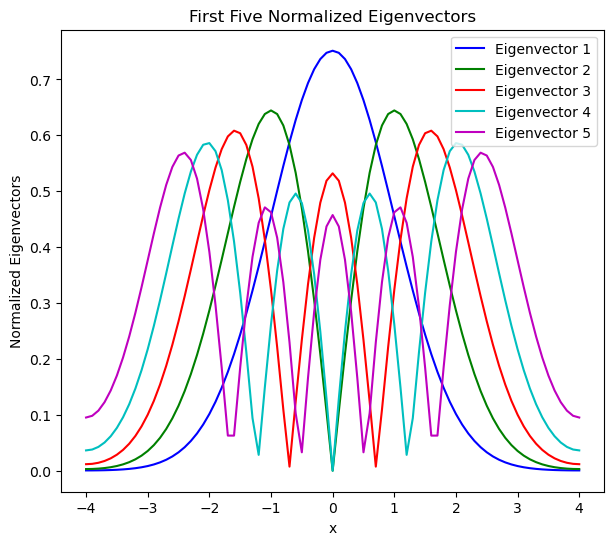

[[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [1.12148676e-02 4.58645543e-02 1.25018106e-01 2.59248830e-01
  4.24643293e-01]
 [1.49018556e-02 5.88460055e-02 1.541287

In [5]:
import numpy as np
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

# Parameters
L = 4  # domain size
N = 79 # discretization of interior
x = np.linspace(-L, L, N + 2)  # add boundary points
dx = x[1] - x[0]  # compute dx

# Assuming B1 is computed from previous code
# Construct potential matrix P
P = np.zeros((N, N))
for j in range(N):
    P[j, j] = x[j + 1] ** 2  # potential x^2


# Construct linear operator
linL = -B2 + P

# Compute eigenvalues and eigenvectors
print(linL)
D, V = eigs(linL,k=5,which='SM')

V2 = np.vstack([4/3 * V[0,:] - 1/3 * V[1,:], V, 4/3 * V[-1,:] - 1/3 * V[-2, :]])

# Sort eigenvalues and eigenvectors based on the absolute value of eigenvalues
sorted_indices = np.argsort(np.abs(D))
Dsort = D[sorted_indices]
Vsort = V2[:, sorted_indices]

# Select the first five normalized eigenvalues and eigenvectors
D5 = np.abs(Dsort[:5])  # take absolute values of eigenvalues
V5 = Vsort[:, :5]       # corresponding eigenvectors

print(V5.shape)
print(x.shape)

# Normalize eigenvectors
for i in range(5):
    norm_factor = np.sqrt(np.trapz(np.abs(V5[:, i])**2, x))  
    V5[:, i] /= norm_factor

# Print normalized eigenvalues
print("First five absolute normalized eigenvalues:")
print(D5)

# Plot the first five normalized eigenvectors
colors = ['b', 'g', 'r', 'c', 'm']
plt.figure(figsize=(7, 6))
for i in range(5):
    plt.plot(x, np.abs(V5[:, i]), color=colors[i], label=f"Eigenvector {i+1}")
plt.xlabel("x")
plt.ylabel("Normalized Eigenvectors")
plt.title("First Five Normalized Eigenvectors")
plt.legend()
plt.show()

A3 = np.real(np.abs(V5))
A4 = D5

print(A3)

In [ ]:
## Part C

Eigenvalues for gamma = 0.05: [1.01294479 2.92140579]
Eigenvalues for gamma = -0.05: [0.97404232 2.89312038]


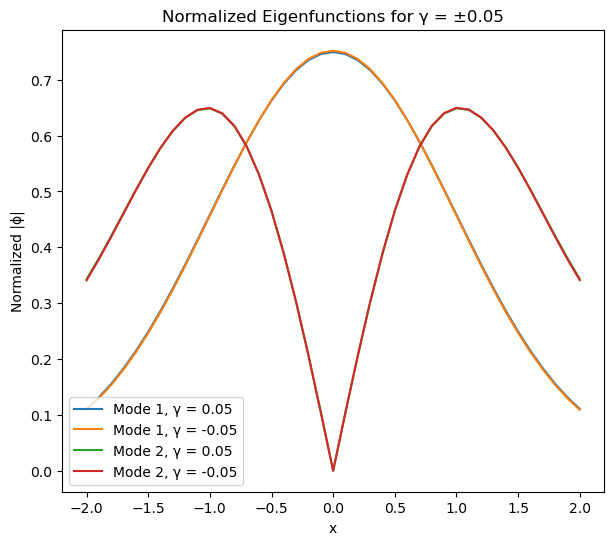

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
L = 2                   # Domain size
x = np.arange(-L, L + 0.1, 0.1)  # Discretized x domain for solving
n = len(x)

# Eigenfunctions/values
eigenvals_pos, eigenvals_neg = np.zeros(2), np.zeros(2)
eigenfunc_pos, eigenfunc_neg = np.zeros((n, 2)), np.zeros((n, 2))

# Define the nonlinear model
def nonlinearmodel(x, y, epsilon, gamma):
    return [y[1], (gamma * (y[0]) ** 2 + x ** 2 - epsilon) * y[0]]

# Solve for eigenfunctions and eigenvalues
for gamma in [-0.05, 0.05]:
    epsilon_start = 0.1
    tol = 1e-6
    
    # Modes loop
    for mode in range(1, 3):
        A = 0.001
        dA = 0.01

        # A loop
        for _ in range(1000):
            epsilon = epsilon_start
            depsilon = 0.1

            # Epsilon loop
            for j in range(1000):
                y0 = [A, A * np.sqrt(L ** 2 - epsilon)]
                sol = solve_ivp(lambda x, y: nonlinearmodel(x, y, epsilon, gamma), 
                                [x[0], x[-1]], y0, t_eval=x)
                ys = sol.y.T
                xs = sol.t
                bcs = ys[-1, 1] + np.sqrt(L ** 2 - epsilon) * ys[-1, 0]

                # Check boundary condition convergence
                if np.abs(bcs) < tol:
                    break

                # Adjust epsilon based on boundary conditions
                if (-1) ** (mode + 1) * bcs > 0:
                    epsilon += depsilon
                else:
                    epsilon -= depsilon
                    depsilon /= 2

            # Normalize eigenfunction
            area = np.trapz(ys[:, 0] ** 2, x=xs)
            if np.abs(area - 1) < tol:
                break

            # Adjust A based on area
            if area < 1:
                A += dA
            else:
                A -= dA / 2
                dA /= 2

        # Store results
        epsilon_start = epsilon + 0.2
        if gamma == 0.05:
            eigenvals_pos[mode - 1] = epsilon
            eigenfunc_pos[:, mode - 1] = np.abs(ys[:, 0])
        else:
            eigenvals_neg[mode - 1] = epsilon
            eigenfunc_neg[:, mode - 1] = np.abs(ys[:, 0])

# Print and plot results
print("Eigenvalues for gamma = 0.05:", eigenvals_pos)
print("Eigenvalues for gamma = -0.05:", eigenvals_neg)

A5 = eigenfunc_pos
A6 = eigenvals_pos
A7 = eigenfunc_neg
A8 = eigenvals_neg

plt.figure(figsize=(7, 6))
for mode in range(2):
    plt.plot(x, eigenfunc_pos[:, mode], label=f"Mode {mode + 1}, γ = 0.05")
    plt.plot(x, eigenfunc_neg[:, mode], label=f"Mode {mode + 1}, γ = -0.05")

plt.xlabel("x")
plt.ylabel("Normalized |ϕ|")
plt.legend()
plt.title("Normalized Eigenfunctions for γ = ±0.05")
plt.show()


In [ ]:
## Part D

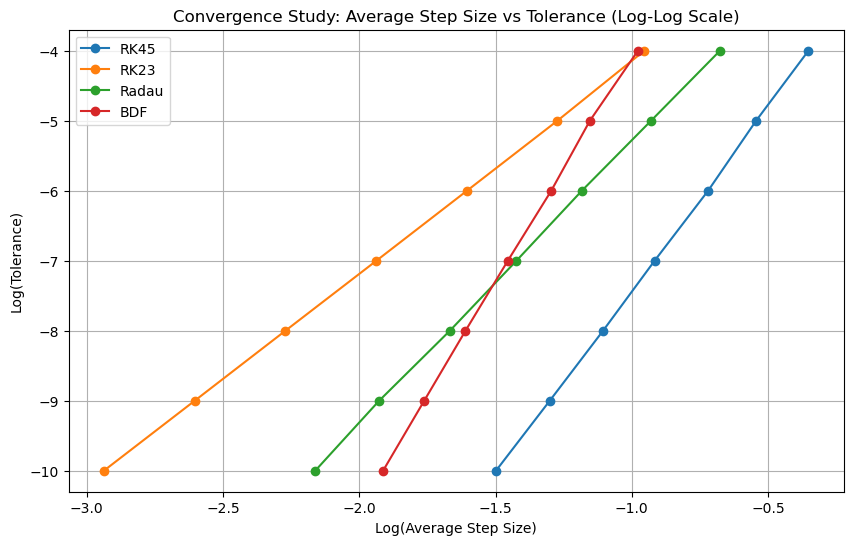

[5.244667561772171, 3.019099529504502, 4.0381992692616135, 6.457512609631297]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
L = 2
x_span = [-L, L]
y0 = [1, np.sqrt(L**2 - 1)]  # initial conditions for ϕ and ϕx
E = 1  # Energy parameter
TOL_values = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# Define the RHS of the differential equation (harmonic oscillator function)
def harmonic_oscillator(x, y, E):
    return [y[1], (x**2 - E) * y[0]]

# Dictionaries to store average step sizes for each solver
avg_step_sizes = {'RK45': [], 'RK23': [], 'Radau': [], 'BDF': []}

# Run simulations for each TOL value with each solver method
for TOL in TOL_values:
    options = {'rtol': TOL, 'atol': TOL}

    # RK45 solver
    sol_RK45 = solve_ivp(harmonic_oscillator, x_span, y0, method='RK45', args=(E,), **options)
    avg_step_size_RK45 = np.mean(np.diff(sol_RK45.t))
    avg_step_sizes['RK45'].append(avg_step_size_RK45)

    # RK23 solver
    sol_RK23 = solve_ivp(harmonic_oscillator, x_span, y0, method='RK23', args=(E,), **options)
    avg_step_size_RK23 = np.mean(np.diff(sol_RK23.t))
    avg_step_sizes['RK23'].append(avg_step_size_RK23)

    # Radau solver
    sol_Radau = solve_ivp(harmonic_oscillator, x_span, y0, method='Radau', args=(E,), **options)
    avg_step_size_Radau = np.mean(np.diff(sol_Radau.t))
    avg_step_sizes['Radau'].append(avg_step_size_Radau)

    # BDF solver
    sol_BDF = solve_ivp(harmonic_oscillator, x_span, y0, method='BDF', args=(E,), **options)
    avg_step_size_BDF = np.mean(np.diff(sol_BDF.t))
    avg_step_sizes['BDF'].append(avg_step_size_BDF)


# Convert to log scale for plotting
log_TOL_values = np.log10(TOL_values)
log_avg_step_sizes_RK45 = np.log10(avg_step_sizes['RK45'])
log_avg_step_sizes_RK23 = np.log10(avg_step_sizes['RK23'])
log_avg_step_sizes_Radau = np.log10(avg_step_sizes['Radau'])
log_avg_step_sizes_BDF = np.log10(avg_step_sizes['BDF'])


# Fit and calculate slopes for RK methods (for convergence order)
slope_RK45, _ = np.polyfit(log_avg_step_sizes_RK45, log_TOL_values, 1)
slope_RK23, _ = np.polyfit(log_avg_step_sizes_RK23, log_TOL_values, 1)
slope_Radau, _ = np.polyfit(log_avg_step_sizes_Radau, log_TOL_values, 1)
slope_BDF, _ = np.polyfit(log_avg_step_sizes_BDF, log_TOL_values, 1)

# Plot the results on a log-log scale
plt.figure(figsize=(10, 6))

# Plot for each solver method
for method, step_sizes in avg_step_sizes.items():
    log_avg_step_sizes = np.log10(step_sizes)
    plt.plot(log_avg_step_sizes, log_TOL_values, 'o-', label=method)

plt.xlabel("Log(Average Step Size)")
plt.ylabel("Log(Tolerance)")
plt.title("Convergence Study: Average Step Size vs Tolerance (Log-Log Scale)")
plt.legend()
plt.grid(True)
plt.show()

A9 = [slope_RK45, slope_RK23, slope_Radau, slope_BDF]
print(A9)

In [ ]:
## Part E

In [18]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# Parameters
L = 4  # Domain size
x = np.linspace(-L, L, 81)  # Discretized x domain for solving
n_modes = 5  # Number of modes to calculate
tol = 1e-4  # Tolerance

# Select the first five normalized eigenvalues and eigenvectors
A2_5 = np.abs(A2[:5])  # take absolute values of eigenvalues
A1_5 = A1[:, :5]       # corresponding eigenvectors

# Function to compute factorial
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

# Exact eigenvalues for the harmonic oscillator problem
exacts = [1, 3, 5, 7, 9]

# Construct exact Gauss-Hermite functions for comparison
h = np.array([np.ones_like(x), 2*x, 4*x**2-2, 8*x**3-12*x, 16*x**4-48*x**2+12])
phi = np.zeros((81, 5))
for j in range(n_modes):
    # normalized j-th Hermite-Gauss function at each x
    phi[:, j] = (np.exp(-x**2 / 2) * h[j, :]) / np.sqrt(np.sqrt(np.pi) * (2**j) * factorial(j))

# Initialize arrays for storing error calculations
eigenfunc_a = np.zeros(5)
eigenval_a = np.zeros(5)
eigenfunc_b = np.zeros(5)
eigenval_b = np.zeros(5)

# Calculate errors for eigenfunctions and eigenvalues
for j in range(n_modes):
    # part A: calculate the L2 norm error for the eigenfunctions
    eigenfunc_a[j] = (np.trapz((np.abs(A1_5[:, j]) - np.abs(phi[:, j]))**2, x))
    eigenfunc_b[j] = (np.trapz((np.abs(V5[:, j]) - np.abs(phi[:, j]))**2, x))
    
    # part B: calculate the relative percent error for eigenvalues
    eigenval_a[j] = 100 * np.abs(A2_5[j] - exacts[j]) / exacts[j]
    eigenval_b[j] = 100 * np.abs(D5[j] - exacts[j]) / exacts[j]

# Print the computed errors
print("Eigenfunction errors for part A:", eigenfunc_a)
print("Eigenvalue errors for part A:", eigenval_a)
print("Eigenfunction errors for part B:", eigenfunc_b)
print("Eigenvalue errors for part B:", eigenval_b)

A10 = eigenfunc_a
A11 = eigenval_a
A12 = eigenfunc_b
A13 = eigenval_b

print(A2_5)


Eigenfunction errors for part A: [4.56719090e-08 1.72431267e-07 2.47863817e-07 4.35480130e-07
 1.96658462e-06]
Eigenvalue errors for part A: [0.02648966 0.03324663 0.03073904 0.0345579  0.04162429]
Eigenfunction errors for part B: [2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]
Eigenvalue errors for part B: [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]
[0.9997351  2.9990026  4.99846305 6.99758095 8.99625381]
